# ODE Lab I: 4th-order Runge-Kutta Methods

In this lab, we will study two different 4th-order Runge-Kutta (RK) methods and compare their performance on a simple test problem: the simple harmonic oscillator.
We will:
1. Review the classical RK4 method.
2. Implement both the classical RK4 and the 3/8 method of Kutta (1901).
3. Compare their numerical errors and observe the expected 4th-order convergence.

## Background

### The Classical RK4 Method

You have already seen in lecture that the 4th-order Runge-Kutta (RK4) method is a widely used time-integration scheme for ordinary differential equations (ODEs) of the form
\begin{align}
\frac{dX}{dt} = f(X, t), \quad X(t_0) = X_0.
\end{align}

At each step, we compute four "slopes":
\begin{align}
k_1 &= \Delta t \, f(X_n, t_n) \\
k_2 &= \Delta t \, f\left(X_n + \frac{1}{2}k_1, t_n + \frac{1}{2}\Delta t\right) \\
k_3 &= \Delta t \, f\left(X_n + \frac{1}{2}k_2, t_n + \frac{1}{2}\Delta t\right) \\
k_4 &= \Delta t \, f\left(X_n + k_3, t_n + \Delta t\right)
\end{align}
Then we update X_{n+1} according to:
\begin{align}
X_{n+1} = X_n + \frac{1}{6} k_1 + \frac{1}{3} k_2 + \frac{1}{3} k_3 + \frac{1}{6} k_4.
\end{align}
This scheme is fourth-order accurate, meaning the local truncation error is $\mathcal{O}(\Delta t^5)$, and the global error (error over an entire integration interval) behaves like $\mathcal{O}(\Delta t^4)$.

### The "3/8" Method (Kutta, 1901)

An alternative set of coefficients yielding the same order of accuracy is:
\begin{align}
k_1 &= \Delta t \, f(X_n, t_n) \\
k_2 &= \Delta t \, f\left(X_n + \frac{1}{3}k_1, t_n + \frac{1}{3}\Delta t\right) \\
k_3 &= \Delta t \, f\left(X_n + k_2 - \frac{1}{3}k_1, t_n + \frac{2}{3}\Delta t\right) \\
k_4 &= \Delta t \, f\left(X_n + k_3 - k_2 + k_1, t_n + \Delta t\right)
\end{align}
with
\begin{align}
X_{n+1} = X_n + \frac{1}{8} k_1 + \frac{3}{8} k_2 + \frac{3}{8} k_3 + \frac{1}{8} k_4.
\end{align}
Again, this achieves fourth-order global accuracy despite having different coefficients than the more common RK4 method.

## Implementing the Methods in Python

Below, you will find two Python functions: `RK4()` for the classical method, and `RK38()` for the 3/8 method.
Both integrate an ODE
\begin{align}
\frac{d}{dt} \begin{pmatrix} x_1 \\ x_2 \\ \vdots \end{pmatrix} = f\bigl(x_1, x_2, \ldots, t\bigr),
\end{align}
over $n$ steps, starting from an initial state $X$ at time $t$, with time step $dt$.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def RK4(f, x, t, dt, n):
    """
    Integrate an ODE using the classical RK4 method.
    
    Parameters
    ----------
    f : function
        The function f(x1, x2, ..., t) returning the derivative(s).
    x : np.ndarray
        The initial condition (can be scalar or vector).
    t : float
        The initial time.
    dt : float
        The time step.
    n : int
        Number of steps to take.
    
    Returns
    -------
    T : np.ndarray
        Times at each integration step, of length n+1.
    X : np.ndarray
        Approximate solutions at each step, shape (n+1, len(x)).
    """
    T = np.array(t)
    X = np.array(x)
    
    for i in range(n):
        k1 = dt * np.array(f(*(x         )))
        k2 = dt * np.array(f(*(x + 0.5*k1)))
        k3 = dt * np.array(f(*(x + 0.5*k2)))
        k4 = dt * np.array(f(*(x +     k3)))
        
        t += dt
        x += k1/6 + k2/3 + k3/3 + k4/6
        
        T = np.append( T, t)
        X = np.vstack((X, x))
        
    return T, X

In [3]:
def RK38(f, x, t, dt, n):
    """
    Integrate an ODE using the 3/8 RK method (Kutta, 1901).
    
    Parameters
    ----------
    f : function
        The function f(x1, x2, ..., t) returning the derivative(s).
    x : np.ndarray
        The initial condition (can be scalar or vector).
    t : float
        The initial time.
    dt : float
        The time step.
    n : int
        Number of steps to take.
    
    Returns
    -------
    T : np.ndarray
        Times at each integration step, of length n+1.
    X : np.ndarray
        Approximate solutions at each step, shape (n+1, len(x)).
    """
    T = np.array(t)
    X = np.array(x)
    
    for i in range(n):
        k1 = dt * np.array(f(*(x         )))
        k2 = dt * np.array(f(*(x + (1/3)*k1)))
        k3 = dt * np.array(f(*(x + (2/3)*k2)))
        k4 = dt * np.array(f(*(x +     k3)))
        
        t += dt
        x += k1/6 + k2/3 + k3/3 + k4/6
        
        T = np.append( T, t)
        X = np.vstack((X, x))
        
    return T, X

## Test Problem: Simple Harmonic Oscillator

We will use the simple harmonic oscillator with small initial amplitude as our test ODE.
Let
\begin{align}
\frac{d\theta}{dt} = \omega, \quad \frac{d\omega}{dt} = -\theta.
\end{align}

If we start with $\theta(0) = 0$ and $\omega(0) = 0.01$, the exact solution is
\begin{align}
\theta(t) = 0.01 \sin(t), \quad \omega(t) = 0.01 \cos(t).
\end{align}

In [5]:
def f_sh(theta, omega):
    """
    Returns the RHS of the simple harmonic oscillator.
    dtheta/dt = omega
    domega/dt = -theta
    """
    return omega, -theta

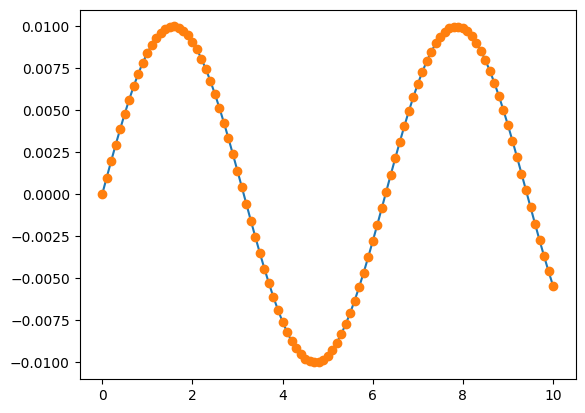

In [6]:
T, X = RK4(f_sh, (0, 0.01), 0, 0.1, 100)

Theta = X[:,0]
Omega = X[:,1]

plt.plot(T, 0.01*np.sin(T))
plt.plot(T, Theta, 'o')

## Measuring the Error

For a given number of steps $N$ over a fixed time interval $t \in [0, T_{\max}]$, we have a time step $\Delta t = T_\max/N$.
After computing the solution numerically, we compare it to the exact solution
\begin{align}
\theta_\text{exact}(t_i) = 0.01 \sin(t_i).
\end{align}
We will measure the maximum absolute error in $\theta$ (though you could also compare $\omega$):
\begin{align}
\text{error} = \max_i \Bigl|\theta_\text{numeric}(t_i) - \theta_\text{exact}(t_i)\Bigr|.
\end{align}
We expect 4th-order methods to show an error scaling like $\mathcal{O}(\Delta t^4)$, so plotting on a log-log scale should reveal a slope of about -4.

1. Defines a function `error_RK4(N)` that runs `RK4()` with `N` steps and returns the maximum error in $\theta$.
2. Similarly defines `error_RK38(N)` for the 3/8 method.
3. Compares both over a range of `N` values (e.g., 64, 128, 256, 512, 1024).
4. Plots the results on a log-log scale, together with a reference line $\propto N^{-4}$.

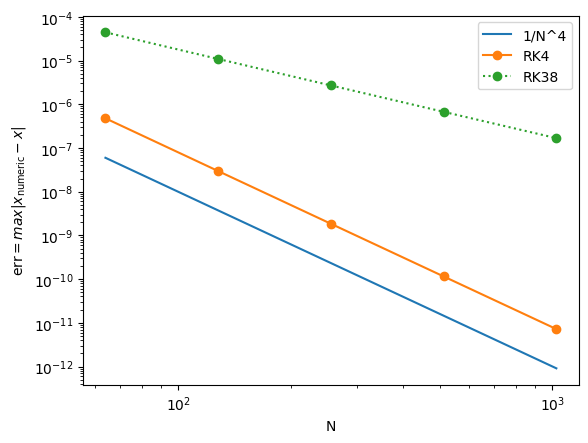

In [7]:
def error_RK4(N=100):
    T, X = RK4(f_sh, (0, 0.01), 0, 10/N, N)
    Theta  = X[:,0]
    Thetap = 0.01 * np.sin(T)
    return np.max(abs(Theta - Thetap))

def error_RK38(N=100):
    T, X = RK38(f_sh, (0, 0.01), 0, 10/N, N)
    Theta  = X[:,0]
    Thetap = 0.01 * np.sin(T)
    return np.max(abs(Theta - Thetap))

N     = np.array([64, 128, 256, 512, 1024])
ERK4  = np.array([error_RK4(n)  for n in N])
ERK38 = np.array([error_RK38(n) for n in N])

plt.loglog(N, 1/N**4,      label='1/N^4')
plt.loglog(N, ERK4,  'o-', label='RK4')
plt.loglog(N, ERK38, 'o:', label='RK38')
plt.xlabel('N')
plt.ylabel(r'$\text{err} = max|x_\text{numeric} - x|$')
plt.legend()